In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/HR.csv')

## remove outlier
df = df.dropna(axis=0, how='any')
df = df[df['last_evaluation']<=1][df['salary']!='nme'][df['department']!='sale']

/Users/shiyuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [3]:
## check the left of each department is different or not
#  using student-t test
dp_indices = df.groupby(by='department').indices

In [4]:
sales_values = df['left'].iloc[dp_indices['sales']].values
technical_values = df['left'].iloc[dp_indices['technical']].values
print (ss.ttest_ind(sales_values, technical_values)[1])

0.2891069046174478


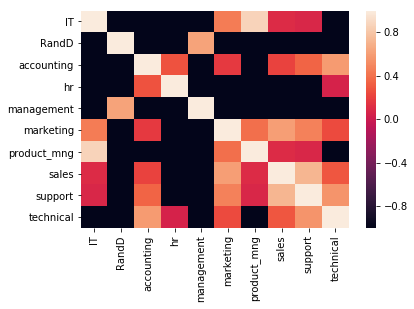

In [5]:
dp_keys =list(dp_indices.keys())
dp_t_mat = np.zeros([len(dp_keys), len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values, 
                              df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05:
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
sns.heatmap(dp_t_mat, xticklabels=dp_keys, yticklabels=dp_keys)
plt.show()

The more dark color means the value is much more close to 0. Namely, there is no correlation. Also, the dark color means there is a significant difference.

In [6]:
## or use pivot table
piv_tf = pd.pivot_table(df, 
                        values='left', 
                        index=['promotion_last_5years', 'salary'], 
                        columns=['Work_accident'], 
                        aggfunc=np.mean)
piv_tf

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

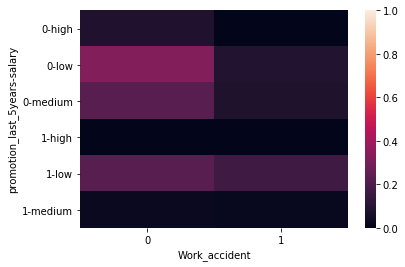

In [7]:
sns.heatmap(piv_tf, vmin=0, vmax=1)
plt.show()

the more light color means the left rate is higher.

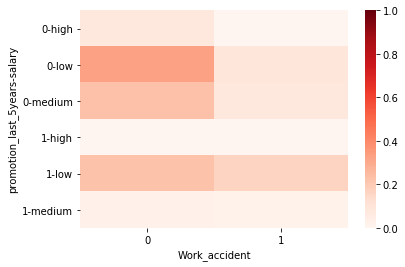

In [8]:
## change the colors
sns.heatmap(piv_tf, vmin=0, vmax=1, cmap=sns.color_palette('Reds',n_colors=256))
plt.show()

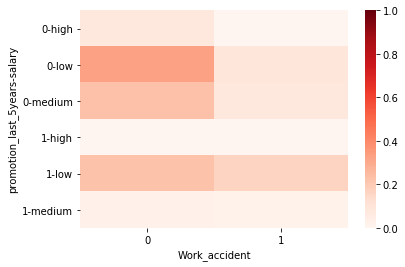

In [9]:
## change hte font size
sns.set_context(font_scale=1.5)
sns.heatmap(piv_tf, vmin=0, vmax=1, cmap=sns.color_palette('Reds',n_colors=256))
plt.show()